In [30]:
import numpy as np

# 1
class KnnClassifier:
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
        
    def classify_image(self, test_image, num_neighbors = 3, metric = 'l2', p = 2):
        distances = []
        if metric == 'l1':
            distances = np.sum(abs(test_image - train_images), axis=1)
        elif metric == 'l2':
            distances = np.sqrt(np.sum(np.power(test_image - train_images, 2), axis=1))
        elif metric == 'mink':
            distances = np.power(np.sum(np.power(abs(test_image - train_images), p), axis=1), 1/p)
        distances = np.argsort(distances)
        
        ind = 0
        neighbors_labels = []
        while ind < num_neighbors:
            neighbors_labels.append(train_labels[distances[ind]])
            ind += 1
        label = np.argmax(np.bincount(neighbors_labels))
        return label
    
    def classify_images(self, test_images, num_neighbors = 3, metric = 'mink'):
        labels = []
        for image in test_images:
            labels.append(self.classify_image(image, num_neighbors, metric))
        labels = np.array(labels)
        return labels
    
    def accuracy_score(self, labels, test_labels):
        accuracy = np.sum([1 if labels[i] == test_labels[i] else 0 for i in range(len(labels))])
        return accuracy / len(labels)

C:\Users\anama\AppData\Local\Temp\ipykernel_23608\2418534907.py:4: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  train_labels = np.loadtxt('data_MNIST/data/train_labels.txt', 'int')
C:\Users\anama\AppData\Local\Temp\ipykernel_23608\2418534907.py:6: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)`

0.884
0.898
0.896
0.88
0.88


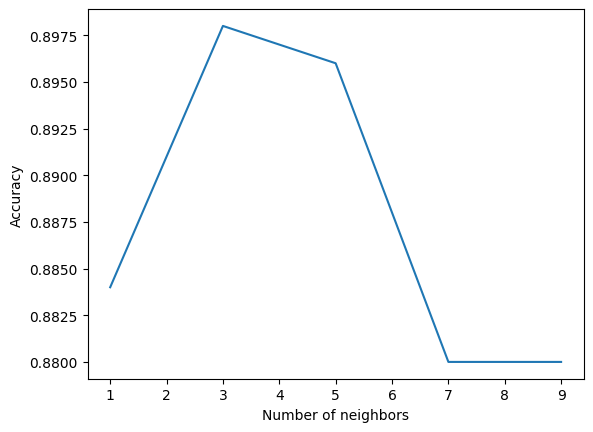

In [31]:
import matplotlib.pyplot as plt

train_images = np.loadtxt('data_MNIST/data/train_images.txt')
train_labels = np.loadtxt('data_MNIST/data/train_labels.txt', 'int')
test_images = np.loadtxt('data_MNIST/data/test_images.txt')
test_labels = np.loadtxt('data_MNIST/data/test_labels.txt', 'int')

knn_classifier = KnnClassifier(train_images, train_labels)
labels = knn_classifier.classify_images(test_images, 3, 'mink')
accuracy = knn_classifier.accuracy_score(labels, test_labels)
# print(accuracy)

num_neighbors = [1, 3, 5, 7, 9]
accuracy = []
for num in num_neighbors:
    labels = knn_classifier.classify_images(test_images, num, 'mink')
    acc = knn_classifier.accuracy_score(labels, test_labels)
    print(acc)
    accuracy.append(acc)
plt.plot(num_neighbors, accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy of implemented model')
plt.show()

0.884
0.898
0.896
0.88
0.88


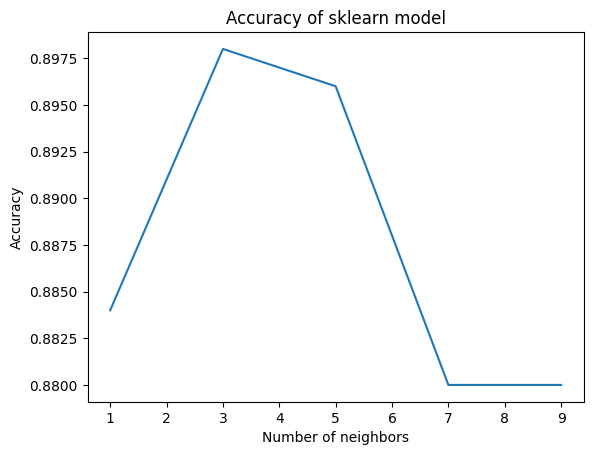

In [35]:
from sklearn.neighbors import KNeighborsClassifier

num_neighbors = [1, 3, 5, 7, 9]
accuracy = []
for num in num_neighbors:
    model = KNeighborsClassifier(n_neighbors=num)
    model.fit(train_images, train_labels)
    labels = model.predict(test_images)
    acc = knn_classifier.accuracy_score(labels, test_labels)
    print(acc)
    accuracy.append(acc)
plt.plot(num_neighbors, accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy of sklearn model')
plt.show()